# Laboratorio 5

* Diego Alonso Carrillo Arroyo
* Jose Antonio Serrano Quesada

Librerias

In [14]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg  
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

Análisis del problema            5


Se debe poder identificar y clasificar caras dependiendo si estan utilizando una mascarilla o no.


Visualizacion                        10


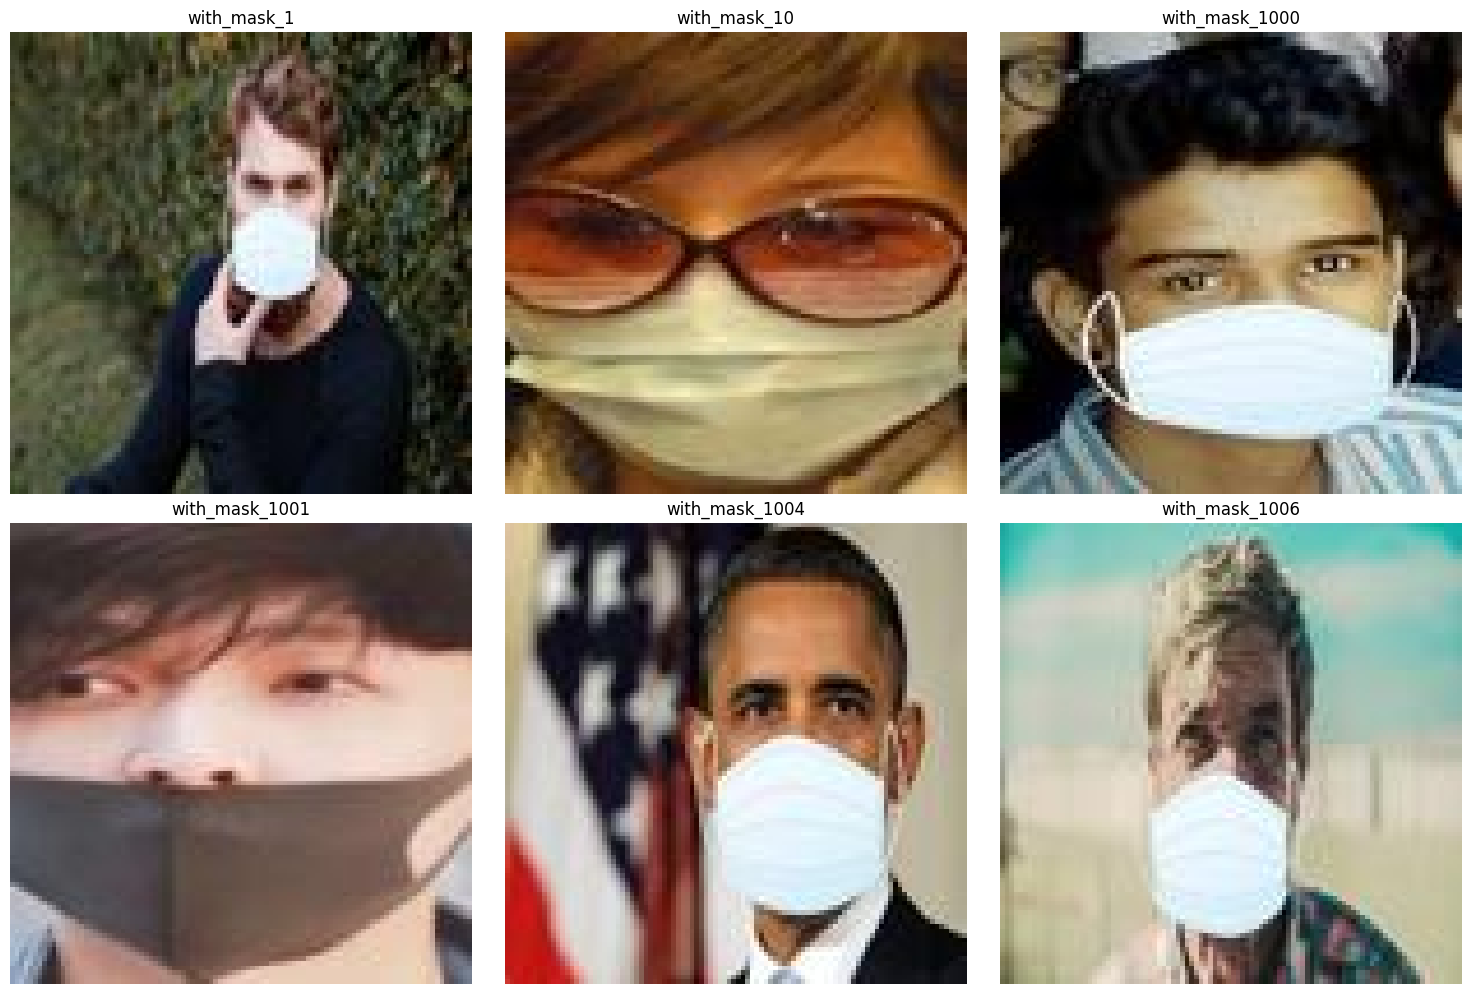

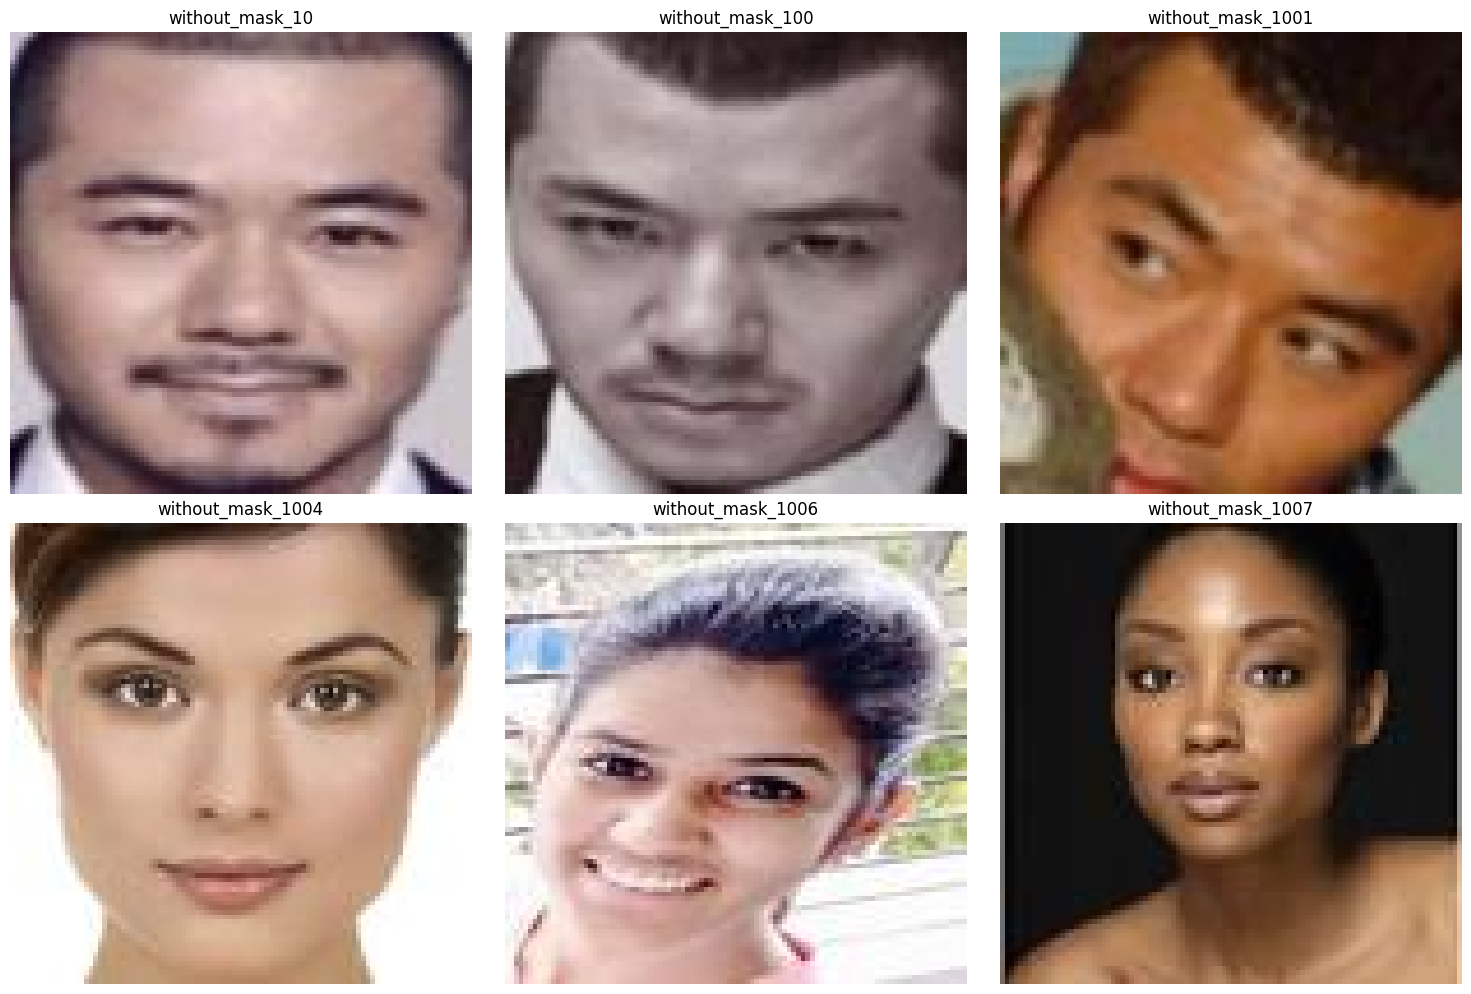

In [15]:
# se muestran las imagenes de ejemplo, para tener una idea de lo que tenemos que trabajar.
def display_images_with_labels(path, num_images=6):
    # Get a list of all image file names in the directory
    image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
    
    # Display the images with their labels
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))

    for i in range(min(num_images, len(image_files))):
        # Get the image file name and its label
        image_file = image_files[i]
        label = image_file.split('.')[0]

        # Load and display the image
        img_path = os.path.join(path, image_file)
        img = mpimg.imread(img_path)
        ax = axs[i // 3, i % 3]
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(label)

    plt.tight_layout()
    plt.show()

# Example usage:
path = "dataset_preprocessed/train/with_mask"
display_images_with_labels(path)

path = "dataset_preprocessed/train/without_mask"
display_images_with_labels(path)


Preparacion de los datos      10


In [16]:
# Se dividen los datos de entrenamiento par empezar el proceso
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,      # Rotate images randomly up to 40 degrees
    width_shift_range=0.2,  # Shift images horizontally up to 20% of the width
    height_shift_range=0.2, # Shift images vertically up to 20% of the height
    shear_range=0.2,        # Shear intensity
    zoom_range=0.2,         # Zoom in randomly up to 20%
    horizontal_flip=True,   # Flip images horizontally
    fill_mode='nearest'     # Fill in newly created pixels after rotation or shifting
)


train_generator = train_datagen.flow_from_directory(
    'dataset_preprocessed/train',
    target_size=(100, 100),
    batch_size=10,
    class_mode='binary',
    shuffle=True)  


val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


val_generator = val_datagen.flow_from_directory(
    'dataset_preprocessed/val',
    target_size=(100, 100),
    batch_size=10,
    class_mode='binary',
    shuffle=False)  

Found 5286 images belonging to 2 classes.
Found 757 images belonging to 2 classes.



Modelo de Deep Learning       40


In [17]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),

    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [20]:
# se definen los puntos de parada y la parada temprana , para saber cuando guardar el progreso o detener si ya no se puede aprender mas.
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)


model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)


optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',  
              metrics=['accuracy'])

# Se entreno el modelo por 100 epocas para obtrener un resultado mas preciso.
history = model.fit(train_generator, validation_data=val_generator, epochs=100, callbacks=[model_checkpoint, early_stopping])

Epoch 1/100


C:\Users\diego\PycharmProjects\Lab5DiegoJose\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


529/529 ━━━━━━━━━━━━━━━━━━━━ 104s 186ms/step - accuracy: 0.7439 - loss: 0.5403 - val_accuracy: 0.8943 - val_loss: 0.2764
Epoch 2/100
529/529 ━━━━━━━━━━━━━━━━━━━━ 45s 84ms/step - accuracy: 0.8358 - loss: 0.3924 - val_accuracy: 0.8877 - val_loss: 0.2771
Epoch 3/100
529/529 ━━━━━━━━━━━━━━━━━━━━ 45s 84ms/step - accuracy: 0.8679 - loss: 0.3277 - val_accuracy: 0.9194 - val_loss: 0.1940
Epoch 4/100
529/529 ━━━━━━━━━━━━━━━━━━━━ 46s 86ms/step - accuracy: 0.8746 - loss: 0.3155 - val_accuracy: 0.9260 - val_loss: 0.2020
Epoch 5/100
529/529 ━━━━━━━━━━━━━━━━━━━━ 45s 85ms/step - accuracy: 0.8833 - loss: 0.2771 - val_accuracy: 0.9353 - val_loss: 0.1864
Epoch 6/100
529/529 ━━━━━━━━━━━━━━━━━━━━ 46s 86ms/step - accuracy: 0.8876 - loss: 0.2821 - val_accuracy: 0.9287 - val_loss: 0.1725
Epoch 7/100
529/529 ━━━━━━━━━━━━━━━━━━━━ 45s 86ms/step - accuracy: 0.8993 - loss: 0.2683 - val_accuracy: 0.9379 - val_loss: 0.1566
Epoch 8/100
529/529 ━━━━━━━━━━━━━━━━━━━━ 46s 87ms/step - accuracy: 0.9026 - loss: 0.2405 - va

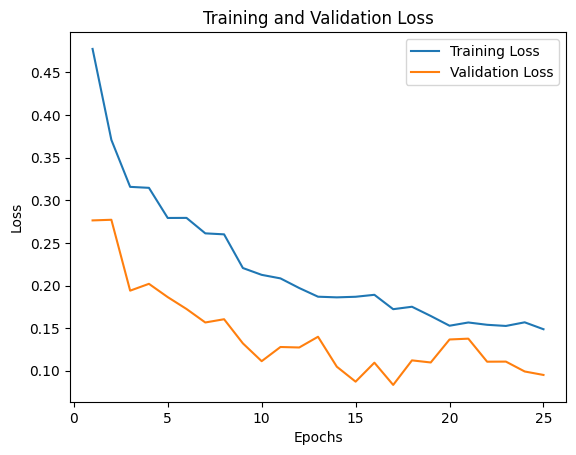

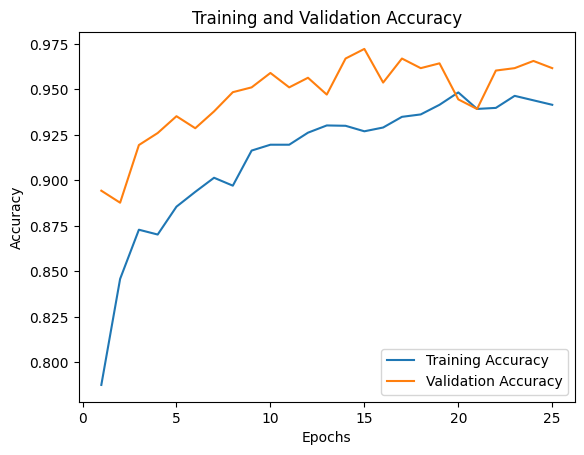

In [21]:
# Se crean graficos con los resultados obtenidos de perdida y precisiona traves de las diferentes epocas de entrenamiento
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']


val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']


plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
model.save("mask.keras")


In [23]:

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'dataset_preprocessed/test',
    target_size=(100, 100),
    batch_size=5,
    class_mode='binary',  
    shuffle=False) 

Found 1510 images belonging to 2 classes.


302/302 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.9572 - loss: 0.1105
Test Loss: 0.10780225694179535
Test Accuracy: 0.9596026539802551
302/302 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


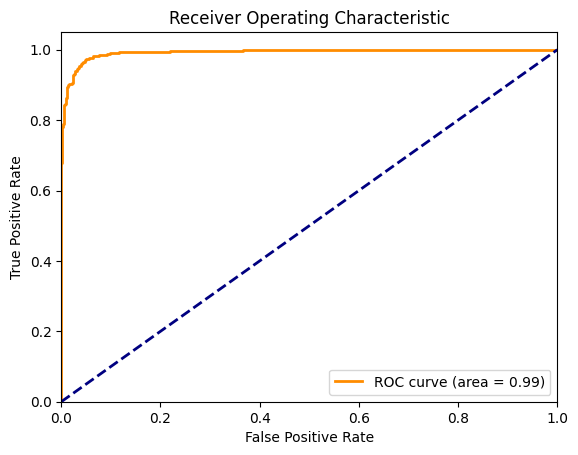

In [24]:
model.load_weights('mask.keras')

# Se evalua el modelo con la data de prueba
loss, accuracy = model.evaluate(test_generator)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# 
true_labels = test_generator.classes
predicted_probabilities = model.predict(test_generator)

# Se crea el PLOT de la curva ROC
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(true_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadero Positivo')
plt.title('Caracteristicas')
plt.legend(loc="lower right")
plt.show()


Conclusion                            10

El modelo dio buenos resultados, obteneniendo un 95% de precision. como se puede oservar en los resultados anteriores.
teniendo una perdida de apenas 11% 